# Exploratory Data Analysis - Fuel Theft Detection

This notebook performs comprehensive exploratory data analysis on the fuel theft detection dataset.

## Objectives
1. Load and inspect combined dataset
2. Analyze telemetry data patterns
3. Visualize fuel level trends
4. Identify potential theft events
5. Examine vehicle behavior patterns
6. Generate data quality report

In [1]:
# Import libraries
import sys
from pathlib import Path
from IPython.display import display  # ensure display(...) works

# Add project root to path
sys.path.insert(0, str(Path.cwd().parent))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings

warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Configure pandas display
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 1. Load Data

In [5]:
# Load combined dataset
DATA_PATH = Path("../data/processed/combined_dataset.csv")

if not DATA_PATH.exists():
    print(f"❌ Data not found: {DATA_PATH}")
    print("Run scripts/01_combine_datasets.py first!")
else:
    df = pd.read_csv(DATA_PATH)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    print(f"✓ Loaded {len(df):,} rows from {DATA_PATH.name}")
    print(f"  Vehicles: {df['vehicle_id'].nunique()}")
    print(f"  Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
    print(f"  Duration: {(df['timestamp'].max() - df['timestamp'].min()).days} days")

✓ Loaded 733,022 rows from combined_dataset.csv
  Vehicles: 4
  Date range: 2024-11-01 00:43:54+00:00 to 2025-04-28 18:40:13+00:00
  Duration: 178 days


## 2. Basic Data Inspection

In [6]:
# Dataset overview
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())

Dataset Shape: (733022, 24)

Column Names:
['timestamp', 'vehicle_id', 'latitude', 'longitude', 'lat', 'lon', 'speed_kmh', 'ignition', 'total_fuel_gal', 'stationary_drain', 'dt_s', 'delta_sec', 'moving', 'is_moving', 'stationary_on', 'is_stationary_on', 'ign_off', 'is_ign_off', 'stationary', 'is_stationary', 'dfuel', 'delta_fuel', 'rate_gpm', 'fuel_med5']


In [7]:
# Data types and missing values
info_df = pd.DataFrame({
    'dtype': df.dtypes,
    'non_null': df.count(),
    'null_count': df.isnull().sum(),
    'null_pct': (df.isnull().sum() / len(df) * 100).round(2)
})

print("\nData Types and Missing Values:")
display(info_df)


Data Types and Missing Values:


,dtype,non_null,null_count,null_pct
timestamp,"datetime64[ns, UTC]",733022,0,0.00
vehicle_id,object,733022,0,0.00
latitude,float64,733009,13,0.00
longitude,float64,733009,13,0.00
lat,float64,733009,13,0.00
lon,float64,733009,13,0.00
speed_kmh,float64,733022,0,0.00
ignition,bool,733022,0,0.00
total_fuel_gal,float64,677123,55899,7.63
stationary_drain,int64,733022,0,0.00


In [8]:
# First few rows
print("\nFirst 10 rows:")
display(df.head(10))


First 10 rows:


,timestamp,vehicle_id,latitude,longitude,lat,lon,speed_kmh,ignition,total_fuel_gal,stationary_drain,dt_s,delta_sec,moving,is_moving,stationary_on,is_stationary_on,ign_off,is_ign_off,stationary,is_stationary,dfuel,delta_fuel,rate_gpm,fuel_med5
0,2025-03-01 00:13:05+00:00,GQU478,4.41,-73.93,4.41,-73.93,0.00,False,133.65,0,NaN,NaN,False,False,False,False,True,True,True,True,NaN,NaN,NaN,133.65
1,2025-03-01 00:33:05+00:00,GQU478,4.41,-73.93,4.41,-73.93,0.00,False,133.65,0,1200.00,1200.00,False,False,False,False,True,True,True,True,0.00,0.00,0.00,133.67
2,2025-03-01 00:53:05+00:00,GQU478,4.41,-73.93,4.41,-73.93,0.00,False,133.69,0,1200.00,1200.00,False,False,False,False,True,True,True,True,0.04,0.04,0.00,133.69
3,2025-03-01 01:13:05+00:00,GQU478,4.41,-73.93,4.41,-73.93,0.00,False,133.77,0,1200.00,1200.00,False,False,False,False,True,True,True,True,0.08,0.08,0.00,133.77
4,2025-03-01 01:33:05+00:00,GQU478,4.41,-73.93,4.41,-73.93,0.00,False,133.77,0,1200.00,1200.00,False,False,False,False,True,True,True,True,0.00,0.00,0.00,133.77
5,2025-03-01 01:57:06+00:00,GQU478,4.41,-73.93,4.41,-73.93,0.00,False,133.77,0,1441.00,1441.00,False,False,False,False,True,True,True,True,0.00,0.00,0.00,133.77
6,2025-03-01 02:17:06+00:00,GQU478,4.41,-73.93,4.41,-73.93,0.00,False,133.77,0,1200.00,1200.00,False,False,False,False,True,True,True,True,0.00,0.00,0.00,133.77
7,2025-03-01 02:37:06+00:00,GQU478,4.41,-73.93,4.41,-73.93,0.00,False,133.89,0,1200.00,1200.00,False,False,False,False,True,True,True,True,0.12,0.12,0.01,133.89
8,2025-03-01 02:57:06+00:00,GQU478,4.41,-73.93,4.41,-73.93,0.00,False,133.89,0,1200.00,1200.00,False,False,False,False,True,True,True,True,0.00,0.00,0.00,133.89
9,2025-03-01 03:17:06+00:00,GQU478,4.41,-73.93,4.41,-73.93,0.00,False,133.89,0,1200.00,1200.00,False,False,False,False,True,True,True,True,0.00,0.00,0.00,133.89


In [9]:
# Statistical summary
print("\nStatistical Summary:")
display(df.describe())


Statistical Summary:


,latitude,longitude,lat,lon,speed_kmh,total_fuel_gal,stationary_drain,dt_s,delta_sec,dfuel,delta_fuel,rate_gpm,fuel_med5
count,733009.00,733009.00,733009.00,733009.00,733022.00,677123.00,733022.00,733018.00,733018.00,625578.00,625578.00,625578.00,732372.00
mean,6.25,-74.50,6.25,-74.50,55.87,137.78,0.00,27.98,27.98,0.04,0.04,0.21,136.96
std,1.94,0.69,1.94,0.69,22.85,51.84,0.02,243.20,243.20,0.88,0.88,2.96,51.35
min,1.99,-76.67,1.99,-76.67,0.00,14.37,0.00,1.00,1.00,-9.20,-9.20,-115.80,14.37
25%,4.68,-74.83,4.68,-74.83,45.00,94.54,0.00,5.00,5.00,0.00,0.00,0.00,94.47
50%,6.22,-74.56,6.22,-74.56,64.00,132.95,0.00,6.00,6.00,0.00,0.00,0.00,132.10
75%,7.08,-73.86,7.08,-73.86,73.00,173.78,0.00,7.00,7.00,0.00,0.00,0.00,172.13
max,10.72,-73.37,10.72,-73.37,121.00,255.10,1.00,7212.00,7212.00,164.55,164.55,1626.00,255.09


## 3. Vehicle-Level Analysis

In [10]:
# Per-vehicle statistics
vehicle_stats = df.groupby('vehicle_id').agg({
    'timestamp': ['min', 'max', 'count'],
    'total_fuel_gal': ['min', 'max', 'mean', 'std'],
    'speed_kmh': ['mean', 'max'],
    'latitude': 'count',
    'ignition': lambda x: (x == True).sum()
}).round(2)

vehicle_stats.columns = ['_'.join(col).strip() for col in vehicle_stats.columns.values]
vehicle_stats['duration_days'] = (
    (vehicle_stats['timestamp_max'] - vehicle_stats['timestamp_min']).dt.days
)

print("Per-Vehicle Statistics:")
display(vehicle_stats)

Per-Vehicle Statistics:


,timestamp_min,timestamp_max,timestamp_count,total_fuel_gal_min,total_fuel_gal_max,total_fuel_gal_mean,total_fuel_gal_std,speed_kmh_mean,speed_kmh_max,latitude_count,ignition_<lambda>,duration_days
vehicle_id,,,,,,,,,,,,
GQU478,2025-03-01 00:13:05+00:00,2025-03-31 23:59:38+00:00,83241,40.01,255.10,144.12,54.98,54.85,90.00,83241,80693,30
WOL981,2025-04-01 00:54:12+00:00,2025-04-28 18:06:35+00:00,116667,31.07,224.58,137.84,52.72,67.12,121.00,116667,113130,27
WOL991,2024-11-01 00:43:54+00:00,2025-03-31 23:43:41+00:00,419312,36.35,252.03,140.80,48.71,55.34,97.00,419299,413108,150
WOM077,2025-04-01 00:45:25+00:00,2025-04-28 18:40:13+00:00,113802,14.37,240.88,122.30,56.56,47.02,96.00,113802,107996,27


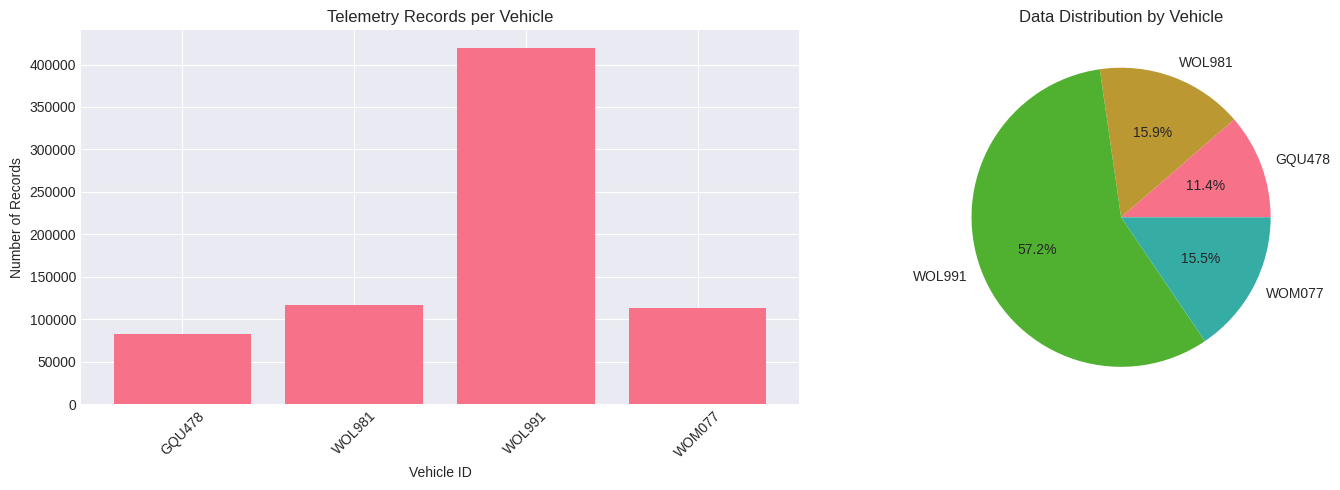

In [11]:
# Visualize data points per vehicle
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot of records per vehicle
vehicle_counts = df['vehicle_id'].value_counts().sort_index()
axes[0].bar(vehicle_counts.index.astype(str), vehicle_counts.values)
axes[0].set_xlabel('Vehicle ID')
axes[0].set_ylabel('Number of Records')
axes[0].set_title('Telemetry Records per Vehicle')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart of data distribution
axes[1].pie(vehicle_counts.values, labels=vehicle_counts.index, autopct='%1.1f%%')
axes[1].set_title('Data Distribution by Vehicle')

plt.tight_layout()
plt.show()

## 4. Fuel Level Analysis

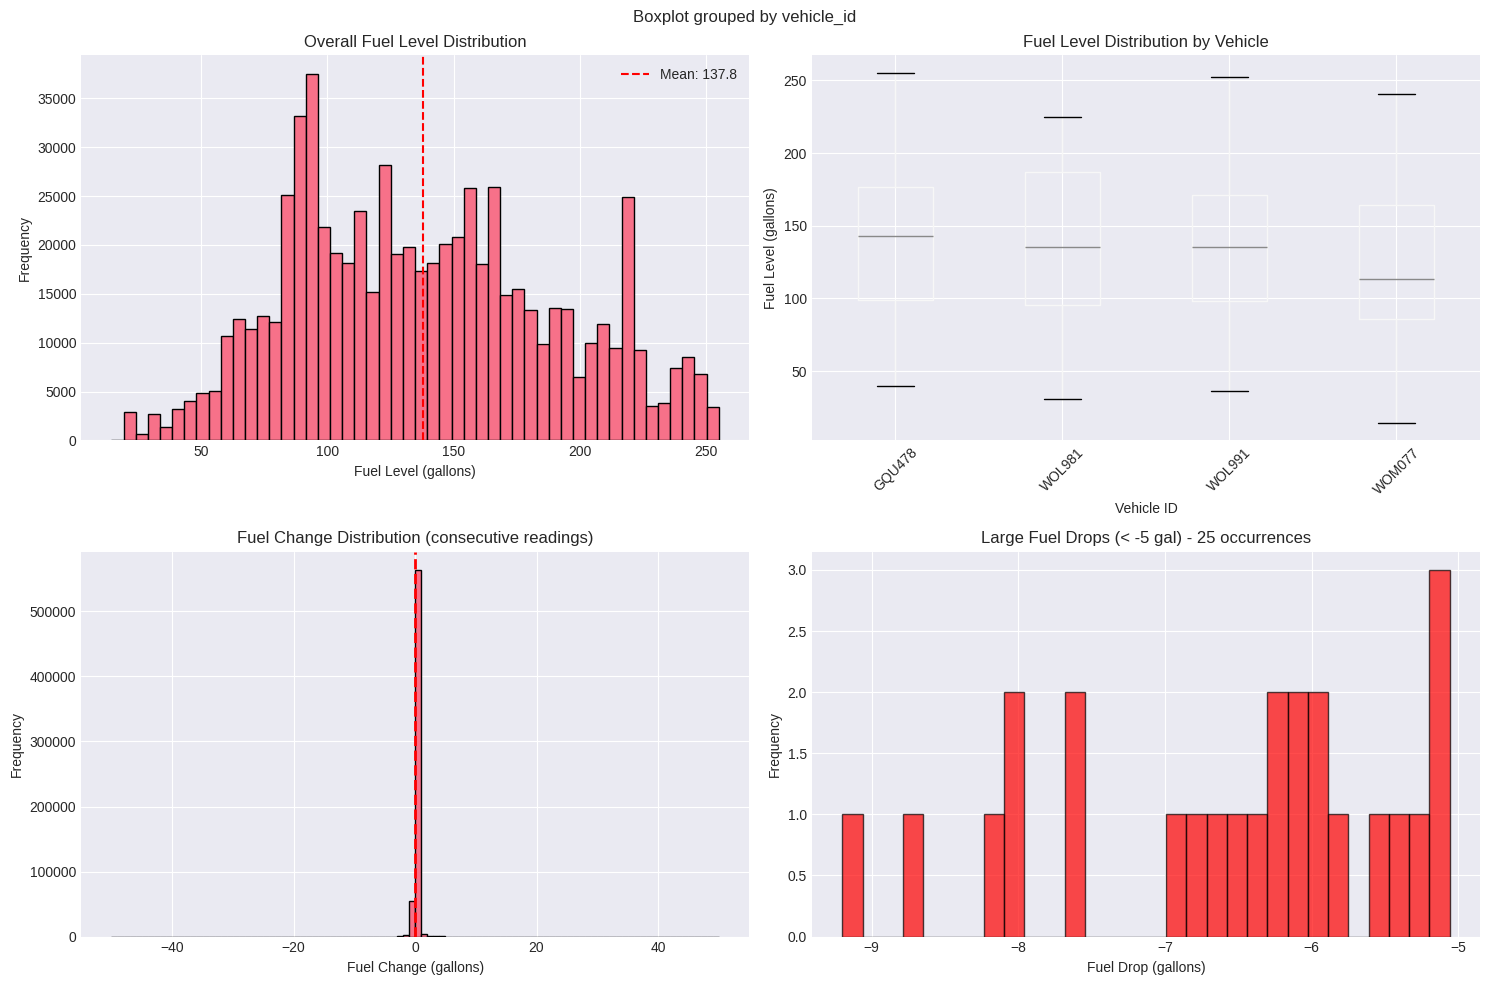


Fuel Change Statistics:
  Mean change: 0.037 gal
  Std dev: 0.880 gal
  Large drops (< -5 gal): 25
  Max drop: -9.20 gal


In [12]:
# Fuel level distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Overall distribution
axes[0, 0].hist(df['total_fuel_gal'].dropna(), bins=50, edgecolor='black')
axes[0, 0].set_xlabel('Fuel Level (gallons)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Overall Fuel Level Distribution')
axes[0, 0].axvline(df['total_fuel_gal'].mean(), color='r', linestyle='--', label=f'Mean: {df["total_fuel_gal"].mean():.1f}')
axes[0, 0].legend()

# Box plot per vehicle
df.boxplot(column='total_fuel_gal', by='vehicle_id', ax=axes[0, 1])
axes[0, 1].set_xlabel('Vehicle ID')
axes[0, 1].set_ylabel('Fuel Level (gallons)')
axes[0, 1].set_title('Fuel Level Distribution by Vehicle')
plt.sca(axes[0, 1])
plt.xticks(rotation=45)

# Fuel changes (differences)
df_sorted = df.sort_values(['vehicle_id', 'timestamp'])
df_sorted['fuel_change'] = df_sorted.groupby('vehicle_id')['total_fuel_gal'].diff()

axes[1, 0].hist(df_sorted['fuel_change'].dropna(), bins=100, edgecolor='black', range=(-50, 50))
axes[1, 0].set_xlabel('Fuel Change (gallons)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Fuel Change Distribution (consecutive readings)')
axes[1, 0].axvline(0, color='r', linestyle='--', linewidth=2)

# Large negative changes (potential thefts)
large_drops = df_sorted[df_sorted['fuel_change'] < -5]['fuel_change']
axes[1, 1].hist(large_drops, bins=30, edgecolor='black', color='red', alpha=0.7)
axes[1, 1].set_xlabel('Fuel Drop (gallons)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title(f'Large Fuel Drops (< -5 gal) - {len(large_drops):,} occurrences')

plt.tight_layout()
plt.show()

print(f"\nFuel Change Statistics:")
print(f"  Mean change: {df_sorted['fuel_change'].mean():.3f} gal")
print(f"  Std dev: {df_sorted['fuel_change'].std():.3f} gal")
print(f"  Large drops (< -5 gal): {len(large_drops):,}")
print(f"  Max drop: {df_sorted['fuel_change'].min():.2f} gal")

## 5. Time Series Visualization

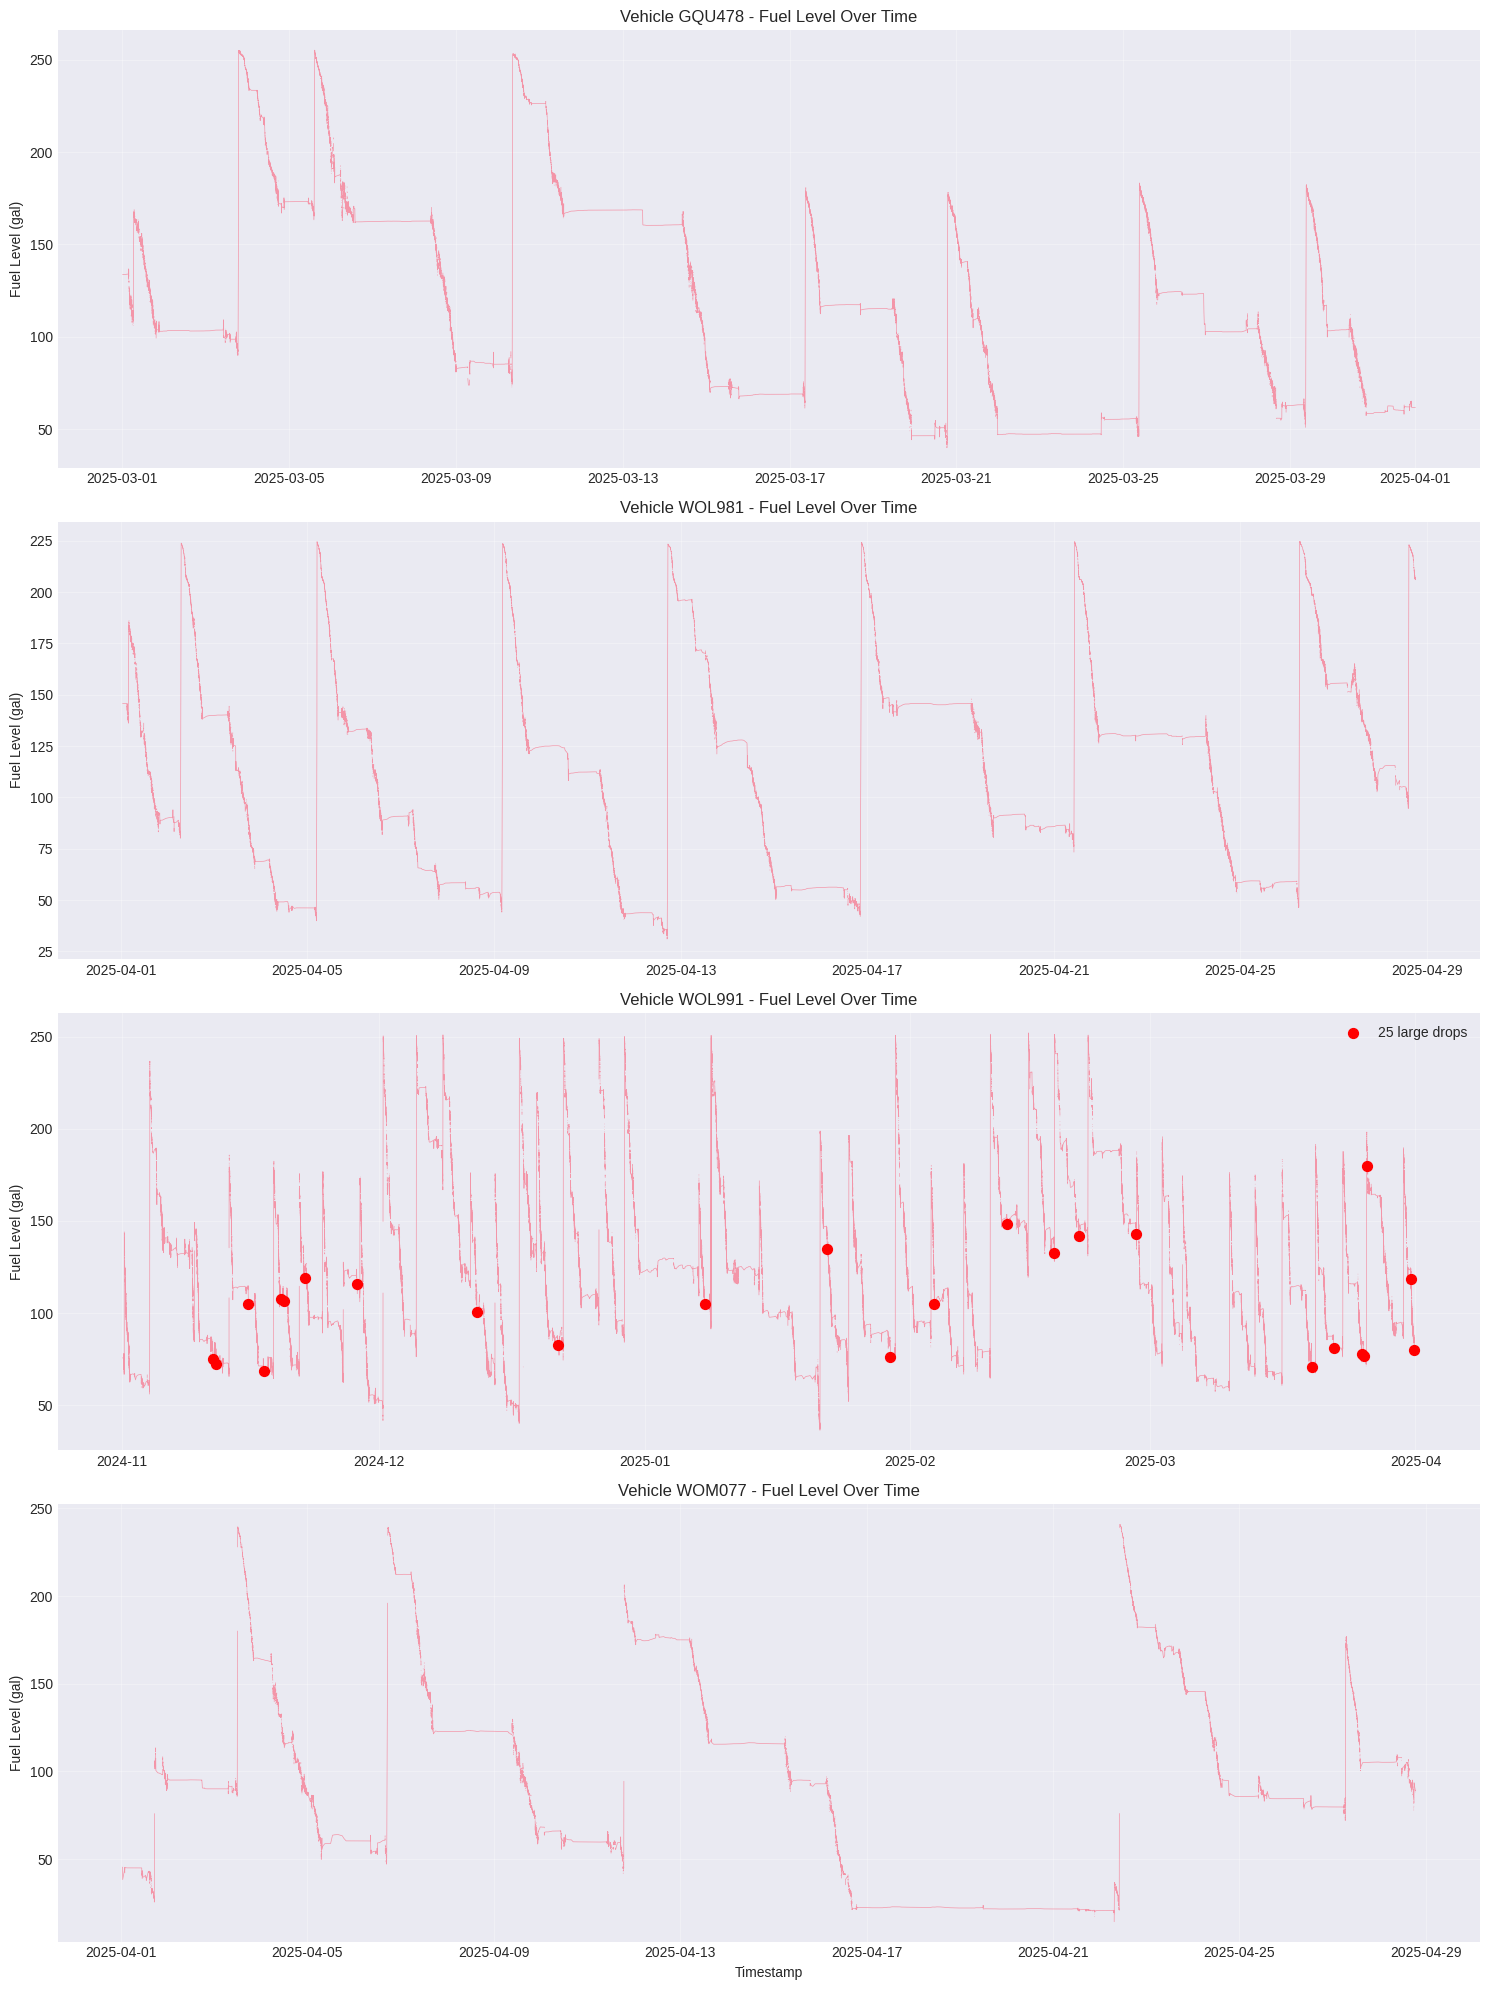

In [13]:
# Plot fuel levels over time for each vehicle
vehicles = df['vehicle_id'].unique()
n_vehicles = len(vehicles)

fig, axes = plt.subplots(n_vehicles, 1, figsize=(15, 5*n_vehicles), sharex=False)

if n_vehicles == 1:
    axes = [axes]

for idx, vehicle in enumerate(vehicles):
    vehicle_data = df[df['vehicle_id'] == vehicle].sort_values('timestamp')
    
    axes[idx].plot(vehicle_data['timestamp'], vehicle_data['total_fuel_gal'], 
                   linewidth=0.5, alpha=0.7)
    axes[idx].set_ylabel('Fuel Level (gal)')
    axes[idx].set_title(f'Vehicle {vehicle} - Fuel Level Over Time')
    axes[idx].grid(True, alpha=0.3)
    
    # Highlight large drops
    vehicle_data['fuel_change'] = vehicle_data['total_fuel_gal'].diff()
    large_drops = vehicle_data[vehicle_data['fuel_change'] < -5]
    
    if len(large_drops) > 0:
        axes[idx].scatter(large_drops['timestamp'], large_drops['total_fuel_gal'], 
                         color='red', s=50, zorder=5, label=f'{len(large_drops)} large drops')
        axes[idx].legend()

axes[-1].set_xlabel('Timestamp')
plt.tight_layout()
plt.show()

## 6. Speed and Movement Analysis

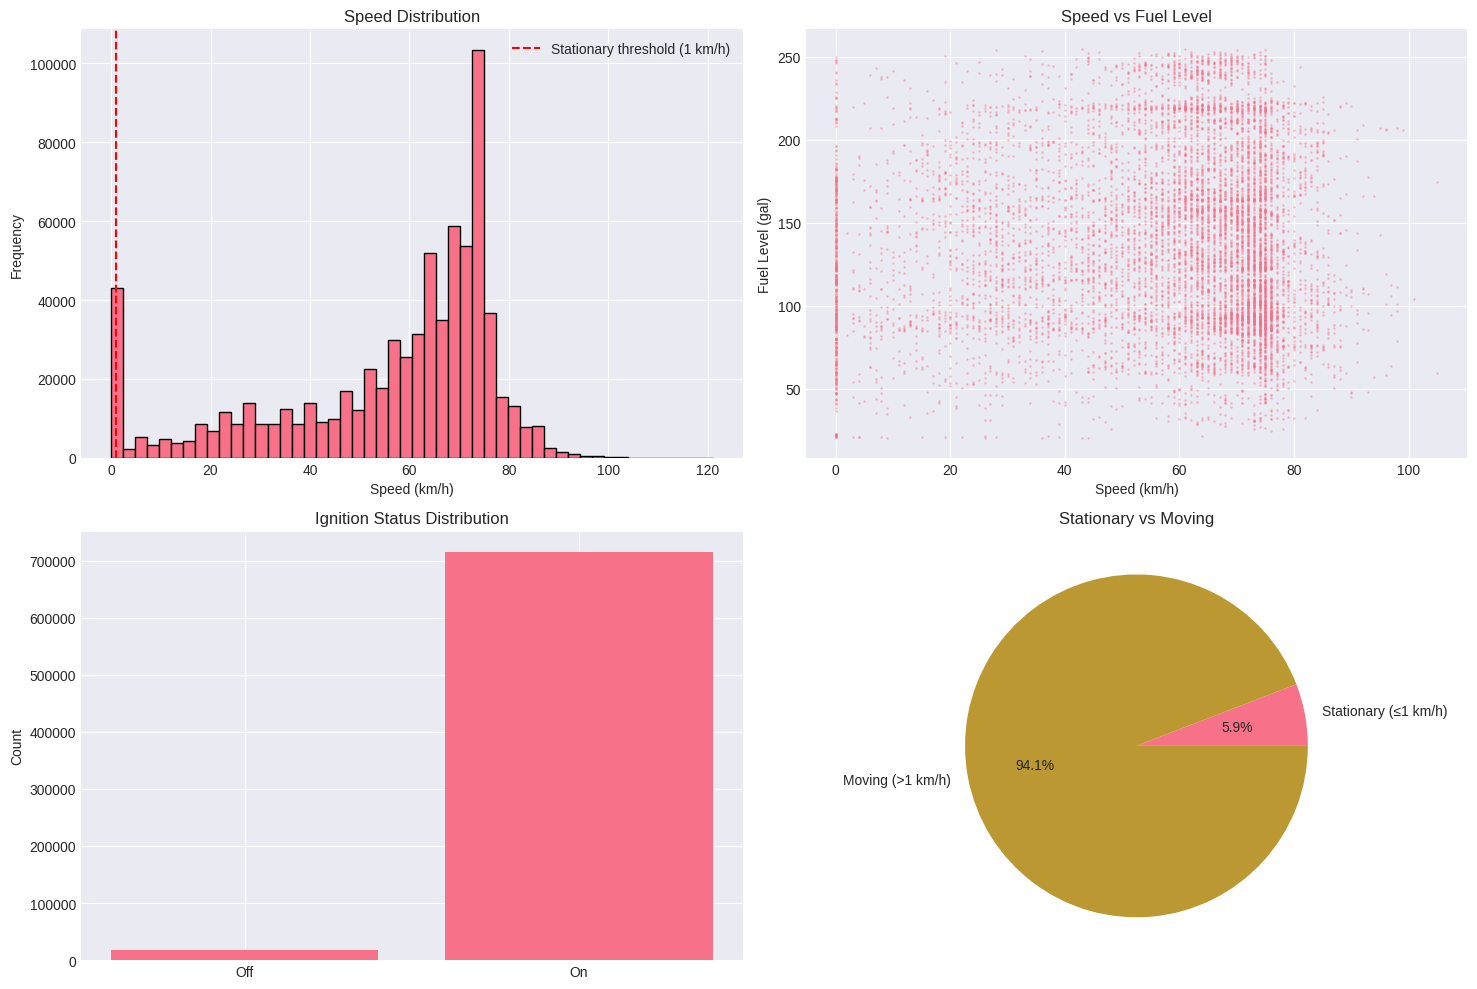


Movement Statistics:
  Stationary points: 42,923 (5.9%)
  Moving points: 690,099 (94.1%)
  Mean speed: 55.87 km/h
  Max speed: 121.00 km/h


In [14]:
# Speed analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Speed distribution
axes[0, 0].hist(df['speed_kmh'].dropna(), bins=50, edgecolor='black')
axes[0, 0].set_xlabel('Speed (km/h)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Speed Distribution')
axes[0, 0].axvline(1, color='r', linestyle='--', label='Stationary threshold (1 km/h)')
axes[0, 0].legend()

# Speed vs Fuel level
sample = df.sample(min(10000, len(df)))
axes[0, 1].scatter(sample['speed_kmh'], sample['total_fuel_gal'], alpha=0.3, s=1)
axes[0, 1].set_xlabel('Speed (km/h)')
axes[0, 1].set_ylabel('Fuel Level (gal)')
axes[0, 1].set_title('Speed vs Fuel Level')

# Ignition status
ignition_counts = df['ignition'].value_counts()
axes[1, 0].bar(['Off', 'On'], [ignition_counts.get(False, 0), ignition_counts.get(True, 0)])
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Ignition Status Distribution')

# Stationary vs Moving
stationary = (df['speed_kmh'] <= 1).sum()
moving = (df['speed_kmh'] > 1).sum()
axes[1, 1].pie([stationary, moving], labels=['Stationary (≤1 km/h)', 'Moving (>1 km/h)'], 
               autopct='%1.1f%%')
axes[1, 1].set_title('Stationary vs Moving')

plt.tight_layout()
plt.show()

print(f"\nMovement Statistics:")
print(f"  Stationary points: {stationary:,} ({stationary/len(df)*100:.1f}%)")
print(f"  Moving points: {moving:,} ({moving/len(df)*100:.1f}%)")
print(f"  Mean speed: {df['speed_kmh'].mean():.2f} km/h")
print(f"  Max speed: {df['speed_kmh'].max():.2f} km/h")

## 7. Geographic Distribution

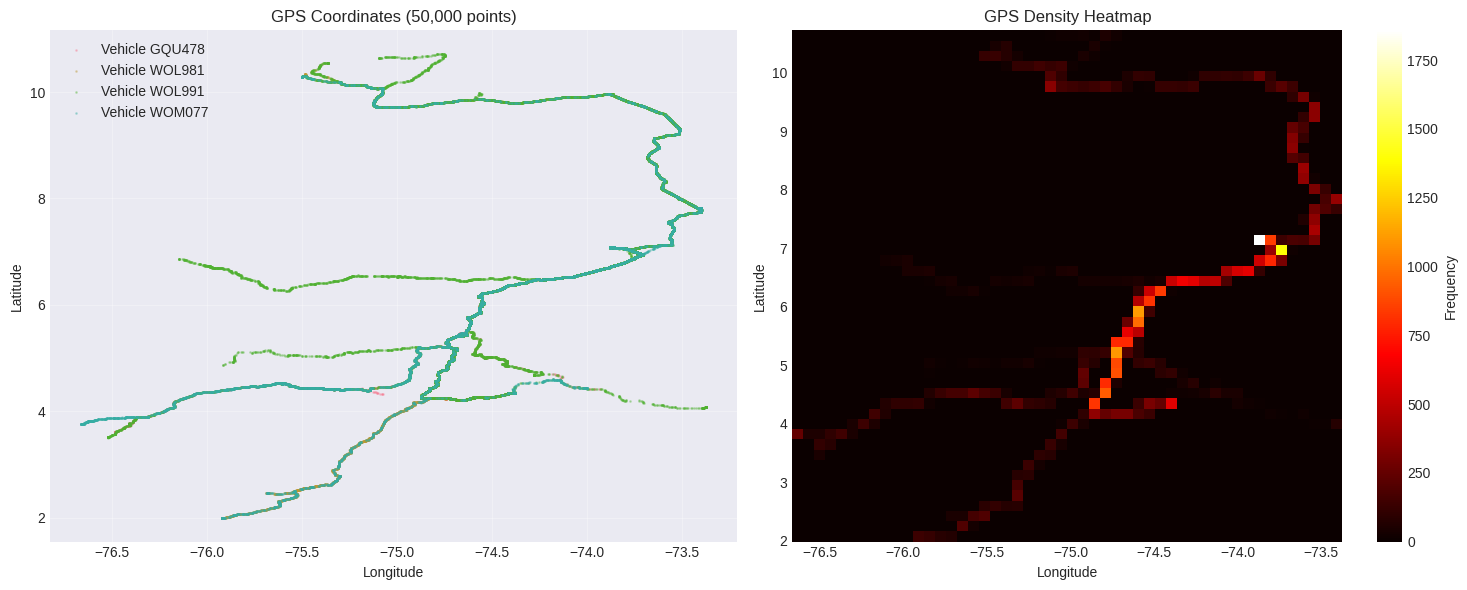


Geographic Statistics:
  Latitude range: 1.9864 to 10.7244
  Longitude range: -76.6650 to -73.3736
  Valid coordinates: 733,009 (100.0%)


In [15]:
# GPS coordinates analysis
valid_coords = df.dropna(subset=['latitude', 'longitude'])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot of GPS coordinates (sample for performance)
sample_size = min(50000, len(valid_coords))
sample = valid_coords.sample(sample_size)

vehicles = df['vehicle_id'].unique()
for vehicle in vehicles:
    vehicle_sample = sample[sample['vehicle_id'] == vehicle]
    axes[0].scatter(vehicle_sample['longitude'], vehicle_sample['latitude'], 
                   alpha=0.3, s=1, label=f'Vehicle {vehicle}')

axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title(f'GPS Coordinates ({sample_size:,} points)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Heatmap (2D histogram)
h = axes[1].hist2d(sample['longitude'], sample['latitude'], bins=50, cmap='hot')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].set_title('GPS Density Heatmap')
plt.colorbar(h[3], ax=axes[1], label='Frequency')

plt.tight_layout()
plt.show()

print(f"\nGeographic Statistics:")
print(f"  Latitude range: {valid_coords['latitude'].min():.4f} to {valid_coords['latitude'].max():.4f}")
print(f"  Longitude range: {valid_coords['longitude'].min():.4f} to {valid_coords['longitude'].max():.4f}")
print(f"  Valid coordinates: {len(valid_coords):,} ({len(valid_coords)/len(df)*100:.1f}%)")

## 8. Temporal Patterns

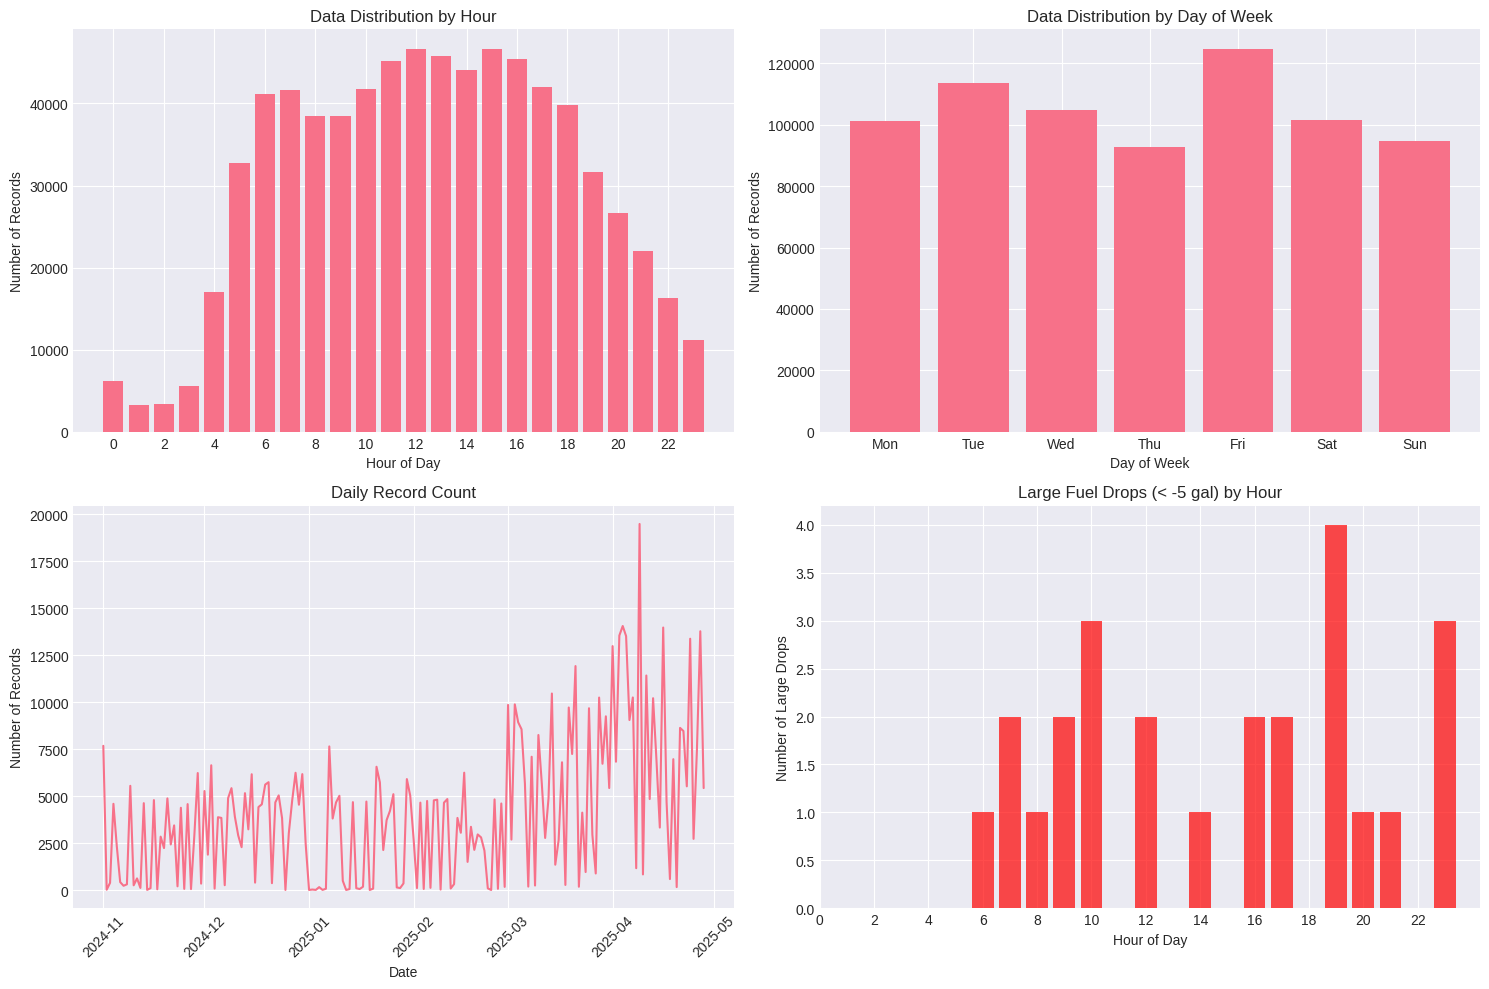

In [16]:
# Temporal analysis
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['date'] = df['timestamp'].dt.date

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Hour of day distribution
hour_counts = df['hour'].value_counts().sort_index()
axes[0, 0].bar(hour_counts.index, hour_counts.values)
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Number of Records')
axes[0, 0].set_title('Data Distribution by Hour')
axes[0, 0].set_xticks(range(0, 24, 2))

# Day of week distribution
dow_counts = df['day_of_week'].value_counts().sort_index()
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[0, 1].bar([day_names[i] for i in dow_counts.index], dow_counts.values)
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Number of Records')
axes[0, 1].set_title('Data Distribution by Day of Week')

# Daily record count
daily_counts = df.groupby('date').size()
axes[1, 0].plot(daily_counts.index, daily_counts.values)
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Number of Records')
axes[1, 0].set_title('Daily Record Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Fuel drops by hour
df_sorted = df.sort_values(['vehicle_id', 'timestamp'])
df_sorted['fuel_change'] = df_sorted.groupby('vehicle_id')['total_fuel_gal'].diff()
df_sorted['hour'] = df_sorted['timestamp'].dt.hour

large_drops_by_hour = df_sorted[df_sorted['fuel_change'] < -5].groupby('hour').size()
axes[1, 1].bar(large_drops_by_hour.index, large_drops_by_hour.values, color='red', alpha=0.7)
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Number of Large Drops')
axes[1, 1].set_title('Large Fuel Drops (< -5 gal) by Hour')
axes[1, 1].set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()

## 9. Data Quality Assessment

In [18]:
# Data quality metrics
print("="*80)
print("DATA QUALITY REPORT")
print("="*80)

print(f"\n1. COMPLETENESS")
completeness = (1 - df.isnull().sum() / len(df)) * 100
for col in df.columns:
    status = "✓" if completeness[col] > 95 else "⚠" if completeness[col] > 80 else "❌"
    print(f"  {status} {col}: {completeness[col]:.2f}%")

print(f"\n2. VALIDITY")
valid_coords = df.dropna(subset=['latitude', 'longitude'])
print(f"  Coordinate validity: {(valid_coords.shape[0] / df.shape[0] * 100):.2f}%")
print(f"  Speed validity: {((df['speed_kmh'] >= 0).sum() / len(df) * 100):.2f}%")
print(f"  Fuel validity: {((df['total_fuel_gal'] >= 0).sum() / len(df) * 100):.2f}%")

print(f"\n3. CONSISTENCY")
# Check for duplicate timestamps per vehicle
duplicates = df.duplicated(subset=['vehicle_id', 'timestamp']).sum()
print(f"  Duplicate timestamps: {duplicates} ({duplicates/len(df)*100:.3f}%)")

# Time gaps analysis
df_sorted = df.sort_values(['vehicle_id', 'timestamp'])
df_sorted['time_gap'] = df_sorted.groupby('vehicle_id')['timestamp'].diff().dt.total_seconds()

# Compute per-row fuel change per vehicle (delta = current - previous)
# Adjust 'total_fuel_gal' to match your actual column name if different.
df_sorted['fuel_change'] = df_sorted.groupby('vehicle_id')['total_fuel_gal'].diff().fillna(0)

# normalize by hours to get rate (gal/hour)
df_sorted['fuel_change_per_hr'] = df_sorted['fuel_change'] / (df_sorted['time_gap'] / 3600).replace(0, np.nan)
df_sorted['fuel_change_per_hr'] = df_sorted['fuel_change_per_hr'].fillna(0)
# ...existing code...

large_gaps = (df_sorted['time_gap'] > 3600).sum()  # > 1 hour
print(f"  Large time gaps (>1h): {large_gaps:,}")

print(f"\n4. ANOMALIES")
print(f"  Large fuel drops (< -5 gal): {(df_sorted['fuel_change'] < -5).sum():,}")
print(f"  Large fuel increases (> 50 gal): {(df_sorted['fuel_change'] > 50).sum():,}")
print(f"  Extreme speeds (> 120 km/h): {(df['speed_kmh'] > 120).sum():,}")

print(f"\n5. COVERAGE")
vehicles = df['vehicle_id'].unique()
for vehicle in vehicles:
    vehicle_data = df[df['vehicle_id'] == vehicle]
    duration = (vehicle_data['timestamp'].max() - vehicle_data['timestamp'].min()).days
    points_per_day = len(vehicle_data) / max(duration, 1)
    print(f"  Vehicle {vehicle}: {duration} days, {points_per_day:.1f} points/day")

DATA QUALITY REPORT

1. COMPLETENESS
  ✓ timestamp: 100.00%
  ✓ vehicle_id: 100.00%
  ✓ latitude: 100.00%
  ✓ longitude: 100.00%
  ✓ lat: 100.00%
  ✓ lon: 100.00%
  ✓ speed_kmh: 100.00%
  ✓ ignition: 100.00%
  ⚠ total_fuel_gal: 92.37%
  ✓ stationary_drain: 100.00%
  ✓ dt_s: 100.00%
  ✓ delta_sec: 100.00%
  ✓ moving: 100.00%
  ✓ is_moving: 100.00%
  ✓ stationary_on: 100.00%
  ✓ is_stationary_on: 100.00%
  ✓ ign_off: 100.00%
  ✓ is_ign_off: 100.00%
  ✓ stationary: 100.00%
  ✓ is_stationary: 100.00%
  ⚠ dfuel: 85.34%
  ⚠ delta_fuel: 85.34%
  ⚠ rate_gpm: 85.34%
  ✓ fuel_med5: 99.91%
  ✓ hour: 100.00%
  ✓ day_of_week: 100.00%
  ✓ date: 100.00%

2. VALIDITY
  Coordinate validity: 100.00%
  Speed validity: 100.00%
  Fuel validity: 92.37%

3. CONSISTENCY
  Duplicate timestamps: 0 (0.000%)
  Large time gaps (>1h): 172

4. ANOMALIES
  Large fuel drops (< -5 gal): 25
  Large fuel increases (> 50 gal): 38
  Extreme speeds (> 120 km/h): 1

5. COVERAGE
  Vehicle GQU478: 30 days, 2774.7 points/day
  

## 10. Summary Statistics Export

In [19]:
# Create comprehensive summary report
summary_report = {
    'dataset_info': {
        'total_rows': len(df),
        'num_vehicles': df['vehicle_id'].nunique(),
        'date_range_start': str(df['timestamp'].min()),
        'date_range_end': str(df['timestamp'].max()),
        'duration_days': (df['timestamp'].max() - df['timestamp'].min()).days
    },
    'fuel_statistics': {
        'mean_fuel_level': float(df['total_fuel_gal'].mean()),
        'std_fuel_level': float(df['total_fuel_gal'].std()),
        'min_fuel_level': float(df['total_fuel_gal'].min()),
        'max_fuel_level': float(df['total_fuel_gal'].max()),
        'large_drops_count': int((df_sorted['fuel_change'] < -5).sum())
    },
    'movement_statistics': {
        'stationary_pct': float((df['speed_kmh'] <= 1).mean() * 100),
        'mean_speed': float(df['speed_kmh'].mean()),
        'max_speed': float(df['speed_kmh'].max())
    },
    'data_quality': {
        'completeness_pct': float(completeness.mean()),
        'valid_coords_pct': float(len(valid_coords) / len(df) * 100),
        'duplicates_count': int(duplicates)
    }
}

# Save to JSON
import json
output_path = Path("../data/eda_outputs/eda_summary.json")
output_path.parent.mkdir(parents=True, exist_ok=True)
with open(output_path, 'w') as f:
    json.dump(summary_report, f, indent=2)

print(f"✓ Summary report saved to: {output_path}")

# Optional: also export helpful tables
try:
    vehicle_stats.to_csv(output_path.parent / "vehicle_stats.csv")
except NameError:
    pass

# Display summary
from pprint import pprint
print("\n" + "="*80)
print("EDA SUMMARY")
print("="*80)
pprint(summary_report)

✓ Summary report saved to: ../data/eda_outputs/eda_summary.json

EDA SUMMARY
{'data_quality': {'completeness_pct': 98.08534370703038,
                  'duplicates_count': 0,
                  'valid_coords_pct': 99.9982265198043},
 'dataset_info': {'date_range_end': '2025-04-28 18:40:13+00:00',
                  'date_range_start': '2024-11-01 00:43:54+00:00',
                  'duration_days': 178,
                  'num_vehicles': 4,
                  'total_rows': 733022},
 'fuel_statistics': {'large_drops_count': 25,
                     'max_fuel_level': 255.1,
                     'mean_fuel_level': 137.779059131425,
                     'min_fuel_level': 14.37,
                     'std_fuel_level': 51.84381987560261},
 'movement_statistics': {'max_speed': 121.0,
                         'mean_speed': 55.86834637978124,
                         'stationary_pct': 5.855622341484976}}
